In [1]:
# add library
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# load data
def loadData(textName):
    data = np.genfromtxt(textName, delimiter = ',')
    X = data[:, :2]
    y = data[:, 2]
    return X, y
# plot data
def plotData(X, y, title = None, xlabel = None, ylabel = None):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    fig, ax = plt.subplots(figsize = (8,6))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.scatter(X[pos, 0], X[pos, 1], marker = '+' ,color = 'black')
    ax.scatter(X[neg, 0], X[neg, 1], color = 'yellow')
    return fig, ax
# plot decision boundery
def plotDecisionBoundery(theta, X, fig, ax, title = None):
    ax.set_title(title)
    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        ax.plot(X[:, 1], (- theta[0] - theta[1] * X[:, 1]) / theta[2], color = 'orange')
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = mapFeature(u[i].reshape((-1, 1)), v[j].reshape(()), 6).dot(theta)
        z = z.T
        ax.contour(u, v, z, 0)
    return fig, ax        
# initial parameter
def initialParameter(X):
    m, n = X.shape
    theta = np.zeros(n)
    return theta, m
# compute cost function
def costFunction(theta, X, y, m):
    y = y.reshape((-1, 1))
    h = sigmoid(X.dot(theta))
    return sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1- h))) / m
# compute gradient
def gradient(theta, X, y, m):
    h = sigmoid(X.dot(theta))
    return (X.T.dot(h - y) / m)
# use it for predicting future test
def predict(theta, X):
    return X.dot(theta) >= 0
# compute accuracy after train
def trainingAccuracy(theta, X, y):
    return np.mean(predict(theta, X) == y) * 100

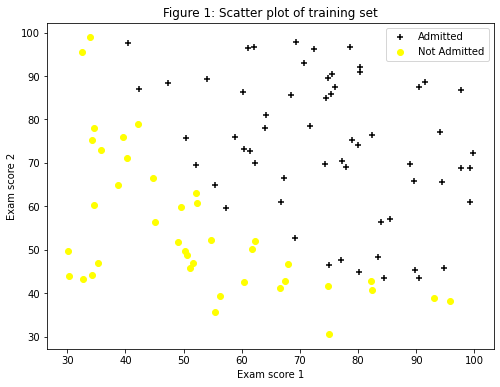

In [2]:
# visualization data 1
X, y = loadData('ex2data1.txt')
fig, ax = plotData(X, y, 'Figure 1: Scatter plot of training set', 'Exam score 1', 'Exam score 2')
ax.legend(['Admitted', 'Not Admitted'])
plt.show()

In [3]:
# add column 1 to X, and initial other parameter
X = np.concatenate((np.ones((len(X), 1)), X), axis = 1)
initial_theta, m = initialParameter(X)

     fun: 0.20349770158947464
     jac: array([9.56475235e-09, 1.37863724e-07, 4.94652395e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131857,   0.20623159,   0.20147149])
-------------------------------- 
 Training accuracy: 89.000000 %


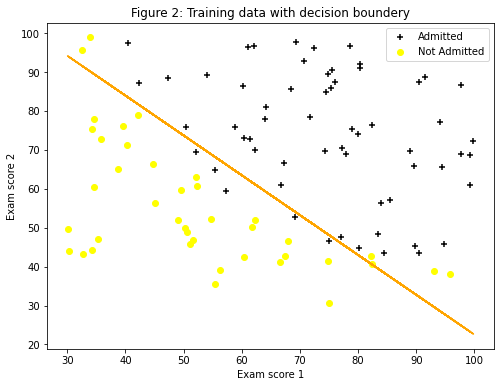

In [4]:
# train model with Truncated Newton Constrained algorithm - TNC
result = op.minimize(fun = costFunction, x0 = initial_theta.flatten(), args = (X, y.flatten(), m), \
                     method = 'TNC', jac = gradient)
print(result)
theta = result.x
print('-------------------------------- \n Training accuracy: %f' % (trainingAccuracy(theta, X, y)), '%')
fig, ax = plotDecisionBoundery(theta, X, fig, ax, 'Figure 2: Training data with decision boundery')
fig

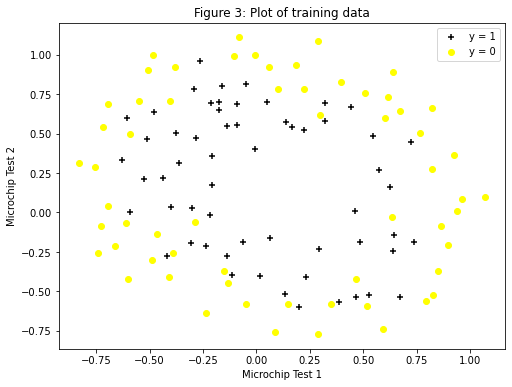

In [5]:
# visualization data 2
X, y = loadData('ex2data2.txt')
fig, ax = plotData(X, y, 'Figure 3: Plot of training data', 'Microchip Test 1', 'Microchip Test 2')
ax.legend(['y = 1', 'y = 0'])
plt.show()

In [6]:
# mapping feature
def mapFeature(X1, X2, degree):
    out = np.ones((len(X1), 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.concatenate((out, X1**(i - j) * X2**j), axis = 1)
    return out
def costFunctionReg(theta, X, y, lam, m):
    J = costFunction(theta, X, y, m)
    J = J + lam * np.sum(theta[1:].dot(theta[1:].T)) / (2 * m)
    return J
def gradientReg(theta, X, y, lam, m):
    grad = gradient(theta, X, y, m)
    grad[1:] = grad[1:] + lam * theta[1:] / m
    return grad

In [7]:
# initial data
X = mapFeature(X[:, 0].reshape((-1, 1)), X[:, 1].reshape((-1, 1)), 6)
initial_theta, m = initialParameter(X)
lam = 1

     fun: 0.5290027299645372
     jac: array([-2.15367337e-06,  6.79284056e-07, -3.49000850e-07,  8.75482981e-07,
       -4.05737448e-08, -9.34076405e-07, -5.14475167e-07,  1.70140718e-08,
        1.53857146e-08, -9.72818844e-07,  6.94925893e-08,  3.54904657e-08,
       -2.79995126e-07,  1.79693519e-07,  2.32865949e-07,  1.47071461e-07,
       -2.12163245e-07,  6.16736797e-07, -9.25615333e-08, -5.28101327e-08,
       -1.48174409e-06,  2.31284160e-07,  1.80334421e-07, -1.31391870e-07,
       -7.18155559e-08, -4.12168462e-07,  1.66501341e-08, -7.35112084e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 7
  status: 1
 success: True
       x: array([ 1.27271024,  0.62529964,  1.18111687, -2.01987398, -0.91743188,
       -1.43166926,  0.12393228, -0.36553118, -0.35725404, -0.17516292,
       -1.45817008, -0.05098418, -0.61558558, -0.27469166, -1.19271299,
       -0.24217841, -0.20603302, -0.04466178, -0.27778947, -0.29539514,
       -0.45645982, -1.04319153,  0.027793

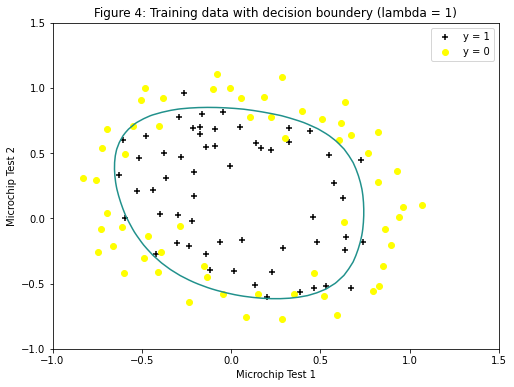

In [8]:
# train model 
result = op.minimize(fun = costFunctionReg, x0 = initial_theta.flatten(), args = (X, y.flatten(), lam, m), \
                     method = 'TNC', jac = gradientReg)
print(result)
theta = result.x
print('-------------------------------- \n Training accuracy: %f' % (trainingAccuracy(theta, X, y)), '%')
fig, ax = plotDecisionBoundery(theta, X, fig, ax, 'Figure 4: Training data with decision boundery (lambda = 1)')
fig